In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [62]:
df["Дата"] = pd.to_datetime(df["Дата"], format="%Y-%m-%d")

In [64]:
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [78]:
grouped_df = df.groupby('Дата')['Количество'].count().reset_index()

Вывести несколько первых строк сгруппированных данных

In [81]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

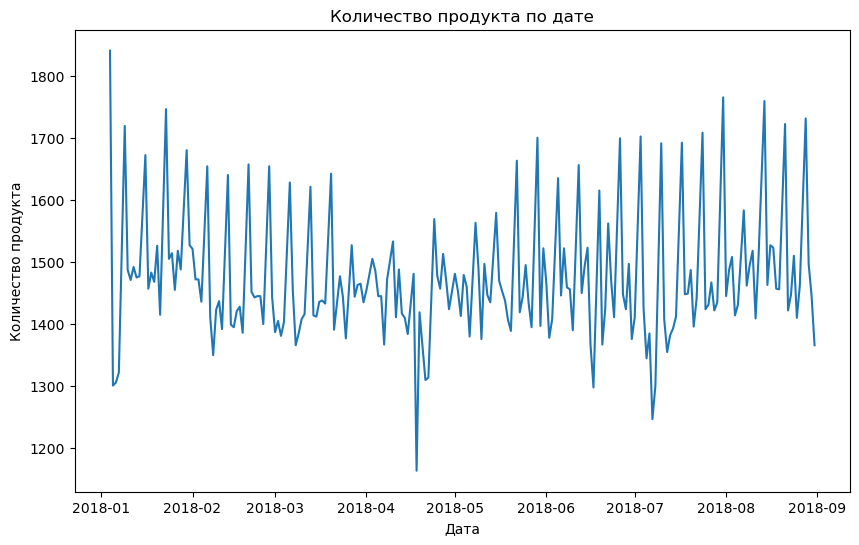

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'],grouped_df['Количество'])
plt.title('Количество продукта по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продукта')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике можно увидеть количество продаж с января 2018г. - сентябрь 2018г.
График имеет свой максимум в начале года, а также и минимум в промежутке 04-05 месяцов 
Также на графике можно увидеть и локальные минимумы и максиму в течении года.
В целом колебания линейного графика лежат в одном промежутке продаж от 1300 - 1750 что о говорит о стабильных продажах в течении года в целом.
Исклчючая значительные минимумы в 2018-05 и 2018-07

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [108]:
Q1 = grouped_df["Количество"].quantile(0.25)
Q3 = grouped_df["Количество"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = grouped_df[grouped_df["Количество"] > upper_bound]
max_outlier = outliers.loc[outliers["Количество"].idxmax()]

print("Строка с максимальным выбросом:")
print(max_outlier)

Строка с максимальным выбросом:
Дата          2018-01-04 00:00:00
Количество                   1840
Name: 0, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [146]:
df = df[df['Дата'].dt.month.isin([6, 7, 8])]
df = df[df['Дата'].dt.weekday == 2]  
df = df[df['Склад'].isin([3])]
top_sales = df.groupby('Номенклатура')['Количество'].sum().reset_index()
top_product = top_sales.loc[top_sales['Количество'].idxmax()]
print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

По этой ссылке скачивается ужасный файл, я его обработал и там нету температуры воздуха, взял атмосферное давление

In [190]:
weather_df = pd.read_csv('weather5.csv')
print(weather_df.head())

         Date     Po      P   U;;;;
0  2018-08-31  736.4  767.9  88;;;;
1  2018-08-31  735.2  766.4  83;;;;
2  2018-08-31  734.8  765.9  80;;;;
3  2018-08-31  733.9  764.8  83;;;;
4  2018-08-31  732.9  763.9  99;;;;


In [192]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1942 non-null   object 
 1   Po      1942 non-null   float64
 2   P       1942 non-null   float64
 3   U;;;;   1942 non-null   object 
dtypes: float64(2), object(2)
memory usage: 60.8+ KB


In [198]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y-%m-%d')
weather_df = weather_df[['Date', 'Po']]
weather_df.columns = ['Дата', 'Атм_давл']

In [200]:
merged_df = pd.merge(grouped_df, weather_df, on='Дата', how='inner')

In [202]:
print(merged_df)

           Дата  Количество  Атм_давл
0    2018-01-04        1840     745.6
1    2018-01-04        1840     745.5
2    2018-01-04        1840     744.8
3    2018-01-04        1840     744.7
4    2018-01-04        1840     744.0
...         ...         ...       ...
1634 2018-08-31        1366     733.9
1635 2018-08-31        1366     732.9
1636 2018-08-31        1366     732.8
1637 2018-08-31        1366     733.6
1638 2018-08-31        1366     734.5

[1639 rows x 3 columns]


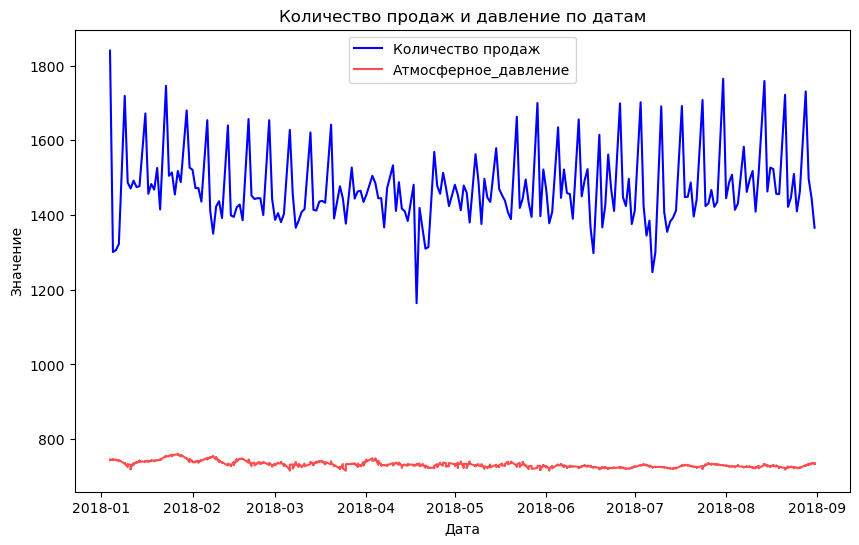

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='blue')
plt.plot(merged_df['Дата'], merged_df['Атм_давл'], label='Атмосферное_давление', color='red', alpha=0.7)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Количество продаж и давление по датам')
plt.legend()
plt.show()

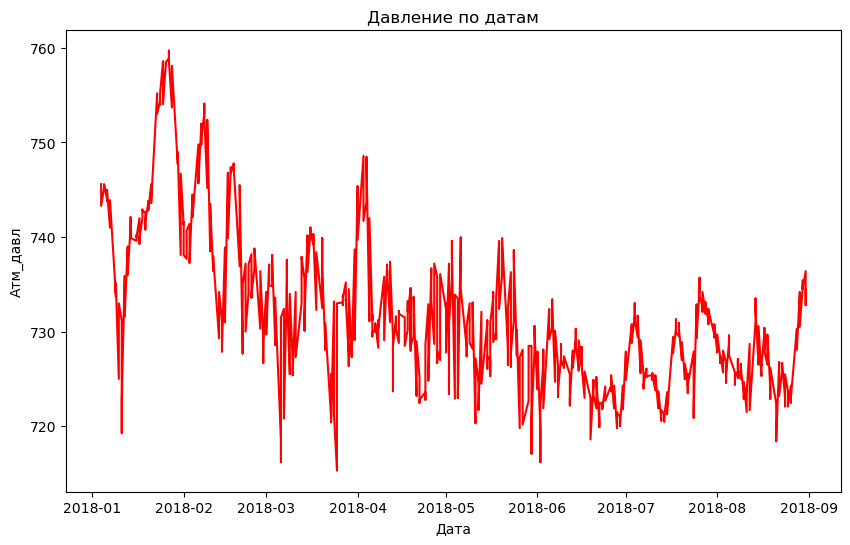

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Атм_давл'], label='Атмосферное давление', color='red')
plt.xlabel('Дата')
plt.ylabel('Атм_давл')
plt.title('Давление по датам')
plt.show()